<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Libraries-and-functions" data-toc-modified-id="Libraries-and-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries and functions</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Directories-and-folders" data-toc-modified-id="Directories-and-folders-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Directories and folders</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Data-preparation-for-Machine-Learning" data-toc-modified-id="Data-preparation-for-Machine-Learning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation for Machine Learning</a></span></li><li><span><a href="#Import-data-from-Regression-Tree-analysis" data-toc-modified-id="Import-data-from-Regression-Tree-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import data from Regression Tree analysis</a></span></li></ul></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forests</a></span><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Tuning-number-of-estimators-and-the-number-of-features-used-in-random-forests" data-toc-modified-id="Tuning-number-of-estimators-and-the-number-of-features-used-in-random-forests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tuning number of estimators and the number of features used in random forests</a></span></li><li><span><a href="#Tuning-pruning-parameters" data-toc-modified-id="Tuning-pruning-parameters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tuning pruning parameters</a></span><ul class="toc-item"><li><span><a href="#Some-relevant-models" data-toc-modified-id="Some-relevant-models-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Some relevant models</a></span></li></ul></li><li><span><a href="#Geographical-visualization-of-the-residuals" data-toc-modified-id="Geographical-visualization-of-the-residuals-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Geographical visualization of the residuals</a></span><ul class="toc-item"><li><span><a href="#Test-residuals" data-toc-modified-id="Test-residuals-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Test residuals</a></span></li><li><span><a href="#Train-residuals" data-toc-modified-id="Train-residuals-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Train residuals</a></span></li><li><span><a href="#All-residuals" data-toc-modified-id="All-residuals-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>All residuals</a></span></li></ul></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Importance-of-features-as-mean-decrease-of-impurity" data-toc-modified-id="Importance-of-features-as-mean-decrease-of-impurity-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Importance of features as mean decrease of impurity</a></span></li><li><span><a href="#Permutation-Importance-of-features" data-toc-modified-id="Permutation-Importance-of-features-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Permutation Importance of features</a></span></li><li><span><a href="#Partial-Dependence-Plots" data-toc-modified-id="Partial-Dependence-Plots-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Partial Dependence Plots</a></span></li><li><span><a href="#Using-SHAP-values" data-toc-modified-id="Using-SHAP-values-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Using SHAP values</a></span><ul class="toc-item"><li><span><a href="#SHAP-beeswarm-summary" data-toc-modified-id="SHAP-beeswarm-summary-3.5.4.1"><span class="toc-item-num">3.5.4.1&nbsp;&nbsp;</span>SHAP beeswarm summary</a></span></li><li><span><a href="#SHAP-importance-of-features" data-toc-modified-id="SHAP-importance-of-features-3.5.4.2"><span class="toc-item-num">3.5.4.2&nbsp;&nbsp;</span>SHAP importance of features</a></span></li><li><span><a href="#SHAP-dependence-plots" data-toc-modified-id="SHAP-dependence-plots-3.5.4.3"><span class="toc-item-num">3.5.4.3&nbsp;&nbsp;</span>SHAP dependence plots</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Initialization

## Libraries and functions

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.cm import get_cmap
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from IPython.display import display, Markdown, HTML
from itertools import product as prod

from MyFunctions import * 
from MyConstants import *

## Settings

In [2]:
# Jupyter notebook appearance
%matplotlib inline
sns.set(context='notebook', style='darkgrid', color_codes=False)
#display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Choose the data to use
year = '2018'  # Year
res = '09'  # Resolution of data hexagones
lc_id = '12'  # Land cover id
lc = 'Croplands'  # Land cover name

# Train-Test percentages
train_size = 0.9
test_size = 0.1

In [4]:
# Scoring metrics used in the analysis
scores = ['MSE', 'R2E']
# Functions for computing the scoring metrics
SCORES = {'MSE': mse,
          'R2E': lambda y_true, y_pred: 1-r2(y_true=y_true, y_pred=y_pred)}
# Dictionary for renaming the scoring metrics of the sklean function GridSearchCV
GS_SCORES = {'neg_MSE': 'neg_mean_squared_error',
             'R2': 'r2'}
# Dictionary for converting the GridSearchCV scoring metrics to the reference 
# scoring metrics
NEW_SCORES = {'neg_MSE': ('MSE', lambda x: x*-1),
              'R2': ('R2E', lambda x: 1-x)}

In [5]:
# Choose whether to save or not the plots
save_plot = False
# Saved Plots' Parameters
SPP = {'dpi': 200, 'format':'jpg', 'bbox_inches':'tight'}
# Scoring metric chosen for the plots visualised. It must be a value in 'scores'
# Notice that plots for all scores will be saved when save_plot = True
srfr = 'R2E' # For Random Forest section
# Labels for plots
slab = {'MSE': 'MSE', 'R2E': r'$1-R^2$'}

In [6]:
# Number of Cross-Validation folds
k = 10
# Base Parameters for Random Forests
RFR_BP = {'bootstrap': True, 'n_jobs': -1, 'random_state': 1}

## Directories and folders

In [7]:
# Dataset directory
data_dir = f"Ecosphere/ISEA3H{res}"
# Directory for output of the notebook
out_dir = f"Output/{lc_id}. {lc}"
# Folder for output according to the train-test percentages
out_folder = f"TTS{int(train_size*100)}{int(test_size*100)}"
# Different brances of outputs
processed_data_dir = f"{out_dir}/Processed data/{out_folder}"
plot_dir = f"{out_dir}/Plots/RFR/{out_folder}"
train_test_data_dir = f"{out_dir}/Train and Test sets"

In [8]:
# Create directories
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(train_test_data_dir, exist_ok=True)

# Data

Import data from all and only the hexagons such that 
- they are not only composed of water bodies;
- all the bioclimatic variables are available.

In [9]:
data = ImportData(year, res, data_dir, land=True, drop_na=True)
display(data.head())

HID                   geometry  IGBP_01_Fraction  IGBP_02_Fraction  \
55   56  POINT (11.25000 79.18998)          0.000000               0.0   
74   75  POINT (11.25000 64.32417)          0.152131               0.0   
75   76  POINT (11.25000 63.56055)          0.179920               0.0   
76   77  POINT (11.25000 62.79923)          0.039768               0.0   
77   78  POINT (11.25000 62.04027)          0.051254               0.0   

    IGBP_03_Fraction  IGBP_04_Fraction  IGBP_05_Fraction  IGBP_06_Fraction  \
55               0.0          0.000000          0.000000          0.000000   
74               0.0          0.000083          0.023048          0.000000   
75               0.0          0.000828          0.043075          0.000000   
76               0.0          0.000414          0.011350          0.000083   
77               0.0          0.000083          0.001159          0.000000   

    IGBP_07_Fraction  IGBP_08_Fraction  ...  BIO10_Centroid  BIO11_Centroid  \
55          0.000000          0.000000  ...        3.900000      -14.300000   
74          0.036395          0.374067  ...       13.450000       -1.933333   
75          0.144881          0.153827  ...       12.766667       -3.883333   
76          0.491301          0.035294  ...        9.883333       -7.500000   
77          0.043388          0.070299  ...        9.683333       -9.533333   

    BIO12_Centroid  BIO13_Centroid  BIO14_Centroid  BIO15_Centroid  \
55           417.0            49.0            18.0       28.678305   
74          1314.0           150.0            62.0       28.921973   
75          1221.0           138.0            70.0       21.339184   
76           779.0            96.0            43.0       25.895052   
77           697.0            92.0            32.0       35.856390   

    BIO16_Centroid  BIO17_Centroid  BIO18_Centroid  BIO19_Centroid  
55           130.0            64.0            85.0           119.0  
74           425.0           215.0           258.0           402.0  
75           379.0           222.0           320.0           317.0  
76           264.0           138.0           257.0           172.0  
77           257.0           103.0           257.0           119.0  

[5 rows x 37 columns]

## Data preparation for Machine Learning

In [10]:
# Random Train-Test set creation

# Directory where train test split is stored
name = f"TrainTestSplit_{int(train_size*100)}{int(test_size*100)}"
file_dir = os.path.join(train_test_data_dir, f'{name}.pickle')

with open(file_dir, 'rb') as file:
    [X_train, X_test, y_train, y_test] = pickle.load(file)
print("---Train-Test split loaded---")

---Train-Test split loaded---


## Import data from Regression Tree analysis

In [11]:
# Directory to store the Grid Search results
file_dir = os.path.join(processed_data_dir, "DTR_DataToExport.pickle")

with open(file_dir, 'rb') as file:
    ccp_alpha = pickle.load(file)
print("---Data imported---")

---Data imported---


# Random Forests

Now, let us make use of the more sofisticated random forests for the same purpose.

## Settings 

In [12]:
# Dictionary associating each scoring metric to the column label used to store 
# values in the datafaframe
SC = {'MSE': {'CV': f'mean_test_MSE'},
      'R2E': {'CV': f'mean_test_R2E', 'OOB':'OOB_R2E'}}

## Tuning number of estimators and the number of features used in random forests

Firstly, let us look at how the number of trees in the random forest influences the performance of the model on the basis of the scoring metrics computed via cross-validation or estimated with the **Out-Of-Bag** (OOB) procedure. Notice that we will use the **warm start** property of random forests.

In [13]:
# Range of n_estimators values further analysed
nmin, nmax = 30, 400
# Number of features
n = len(bv_cols)

# Hyperparameters for the Grid Search
HP1 = {'n_estimators': list(range(nmin, nmax+1, 2)),
       'max_features': [int(np.sqrt(n)), int(n/3), n]}

# Directory to store the Grid Search results
file_dir = os.path.join(processed_data_dir, "RFR_GS1.pickle")

if os.path.exists(file_dir):
    with open(file_dir, 'rb') as file:
        RFR_GS1 = pickle.load(file)
    print("---Grid Search loaded---")
else:
    # Estimator
    rgr = RandomForestRegressor(warm_start=True, oob_score=True, **RFR_BP)
    # Grid Searches with k-fold CV and with OOB
    RFR_GS1 = GridSearchWarmStart(X=X_train, y=y_train,
                                  estimator=rgr, param_grid=HP1,
                                  cv=k, scoring=SCORES, oob_score=True)
    
    with open(file_dir, 'wb') as file:
        pickle.dump(RFR_GS1, file)
    print("---Grid Search performed---")

---Grid Search loaded---


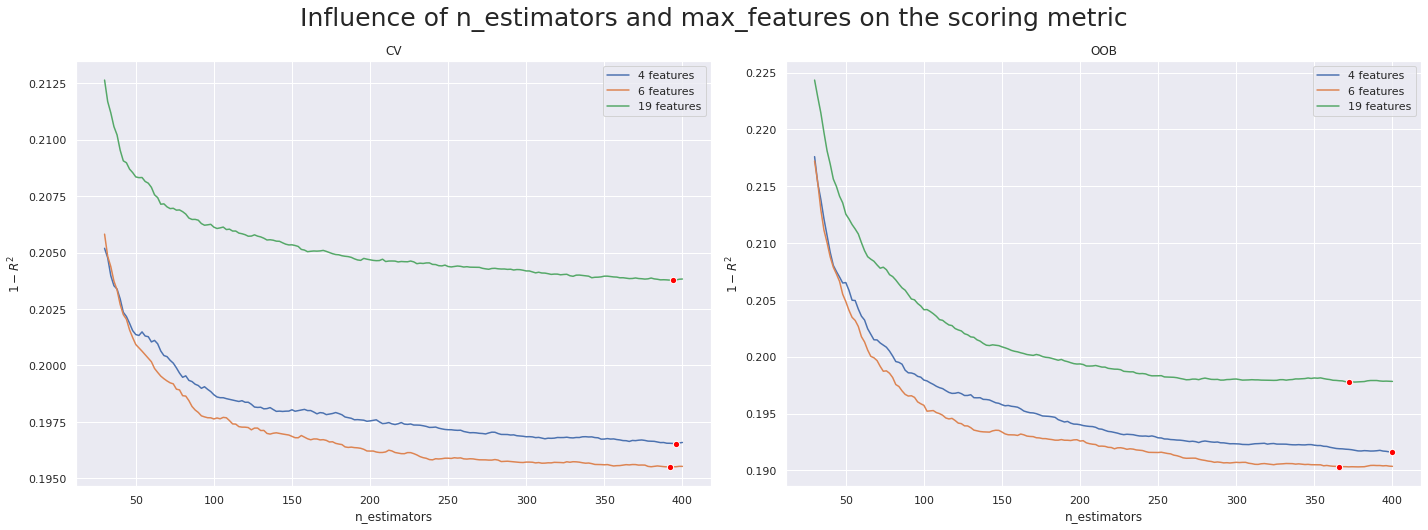

In [14]:
for s in scores:
    fig, axs = plt.subplots(ncols=len(SC[s]), figsize=(10*len(SC[s]), 7))

    for ax, m in zip(np.array(axs).flat, SC[s].keys()):
        for mf in HP1['max_features']:
            R = RFR_GS1[RFR_GS1.param_max_features == mf]\
                .set_index('param_n_estimators')[SC[s][m]]
            ax.plot(R.index, R, label=f"{mf} features", zorder=1)
            ax.scatter(R.idxmin(), R.min(), s=40, c='red', ec='white', zorder=2)

        ax.set(xlabel="n_estimators", ylabel=slab[s], title=m)
        ax.legend()

    plt.tight_layout()
    if save_plot:
        name = f"1.IGBP{lc_id}_RFR_{s}_Gs1Results"
        plt.savefig(os.path.join(plot_dir, f"{name}.{SPP['format']}"), **SPP)
    plt.suptitle("Influence of n_estimators and max_features on the scoring metric",
                 y=1.05, size=25)
    if s==srfr:
        plt.show()
    else:
        plt.close()

In [15]:
# Best n_estimators for each value of max_features in the previous Grid Search
# with respect to each combination of scoring metric and estimation procedure.
# For each pair of parameters, values of the all the scoring metrics are 
# displayed in order to permit comparison, not only the value of the scoring 
# metric for which the minimum is achieved.
BN = pd.DataFrame()

param_cols = {f'param_{key}': key for key in HP1.keys()}
index_cols = ['method', 'scoring'] + sorted(list(param_cols.values()))
score_cols = {val: f'{key}_{s}' for s in scores for key, val in SC[s].items()}

for mf in HP1['max_features']:
    idx = RFR_GS1[RFR_GS1['param_max_features'] == mf][score_cols.keys()]\
        .idxmin()
    R = RFR_GS1.loc[idx, list(param_cols.keys())+list(score_cols.keys())]
    R[['method', 'scoring']] = idx.rename(index=score_cols).index\
                                  .str.split('_').to_list()
    BN = BN.append(R)

BN.rename(columns=param_cols, inplace=True)
BN.rename(columns=score_cols, inplace=True)

BN.set_index(index_cols, inplace=True)

with pd.option_context('display.float_format', '{:.7e}'.format):
    display(BN)

CV_MSE        CV_R2E  \
method scoring max_features n_estimators                               
CV     MSE     4            396          8.5749859e-03 1.9653516e-01   
       R2E     4            396          8.5749859e-03 1.9653516e-01   
OOB    R2E     4            400          8.5772728e-03 1.9658724e-01   
CV     MSE     6            392          8.5294790e-03 1.9550217e-01   
       R2E     6            392          8.5294790e-03 1.9550217e-01   
OOB    R2E     6            366          8.5334198e-03 1.9559295e-01   
CV     MSE     19           394          8.8864753e-03 2.0376897e-01   
       R2E     19           394          8.8864753e-03 2.0376897e-01   
OOB    R2E     19           372          8.8900706e-03 2.0385197e-01   

                                               OOB_R2E  
method scoring max_features n_estimators                
CV     MSE     4            396          1.9167052e-01  
       R2E     4            396          1.9167052e-01  
OOB    R2E     4            400          1.9162374e-01  
CV     MSE     6            392          1.9042248e-01  
       R2E     6            392          1.9042248e-01  
OOB    R2E     6            366          1.9029568e-01  
CV     MSE     19           394          1.9784008e-01  
       R2E     19           394          1.9784008e-01  
OOB    R2E     19           372          1.9775363e-01

## Tuning pruning parameters

Let us now combine pre-pruning and post-pruning strategies by means of grid search. Due to the larger computational effort required by random forests than decision trees, as estimation procedure we make use only of the OOB strategy. Then, we look at how the $R^2$ error vary while tuning the following parameters: 
 - In order to perform *pre-pruning* we consider the parameters `max_dept` and `min_samples_split`;
 - In order to perform *post-pruning*, we consider the parameter `ccp_alpha`.
 
Notice that we will use the **warm start** property of random forests.

In [16]:
# Select n_estimators and max_features minimising the R2 error estimated via OOB
# for further analysis
mf = BN[f'OOB_R2E'].idxmin()[2]
ne = BN[f'OOB_R2E'].idxmin()[3]

display(Markdown(
    "In the previous section, thanks to the estimation through OOB, we have "
    r"selected the following parameters that minimise the $R^2$ error :<br>"
    f"`n_estimators` = {ne}<br>"
    f"`max_features` = {mf}<br>"
    "We will use them in the following."
))

In the previous section, thanks to the estimation through OOB, we have selected the following parameters that minimise the $R^2$ error :<br>`n_estimators` = 366<br>`max_features` = 6<br>We will use them in the following.

In [17]:
rgr = RandomForestRegressor(max_features=mf, n_estimators=ne, **RFR_BP)
rgr.fit(X_train, y_train)
# The depth of the deepest tree in the Random Forest 
md = int(np.max([tree.tree_.max_depth for tree in rgr.estimators_]))
display(Markdown(f"The depth of the deepest tree in the forest is {md}."))

The depth of the deepest tree in the forest is 54.

In [18]:
# Range of max_depth values further analysed
dmin, dmax = 20, md+1

# Hyperparameters for the Grid Search
# Complexity parameters for CCP are those selected for regression trees
HP2 = {'min_samples_split': [2, 5, 10],
       'max_depth': list(range(dmin, dmax+1, 2)),
       'ccp_alpha': ccp_alpha}

# Directory to store the CV results
file_dir = os.path.join(processed_data_dir, 'RFR_GS2.pickle')

if os.path.exists(file_dir):
    with open(file_dir, 'rb') as file:
        RFR_GS2 = pickle.load(file)
    print("---Grid Search loaded---")
else:
    # Estimator
    rgr = RandomForestRegressor(max_features=mf, n_estimators=ne,
                                oob_score=True, warm_start=True, **RFR_BP)
    # Gridsearch with OOB score results
    RFR_GS2 = GridSearchWarmStart(X=X_train, y=y_train,
                                  estimator=rgr, param_grid=HP2,
                                  cv=None, oob_score=True)

    with open(file_dir, 'wb') as file:
        pickle.dump(RFR_GS2, file)
    print("---Grid Search performed---")

---Grid Search loaded---


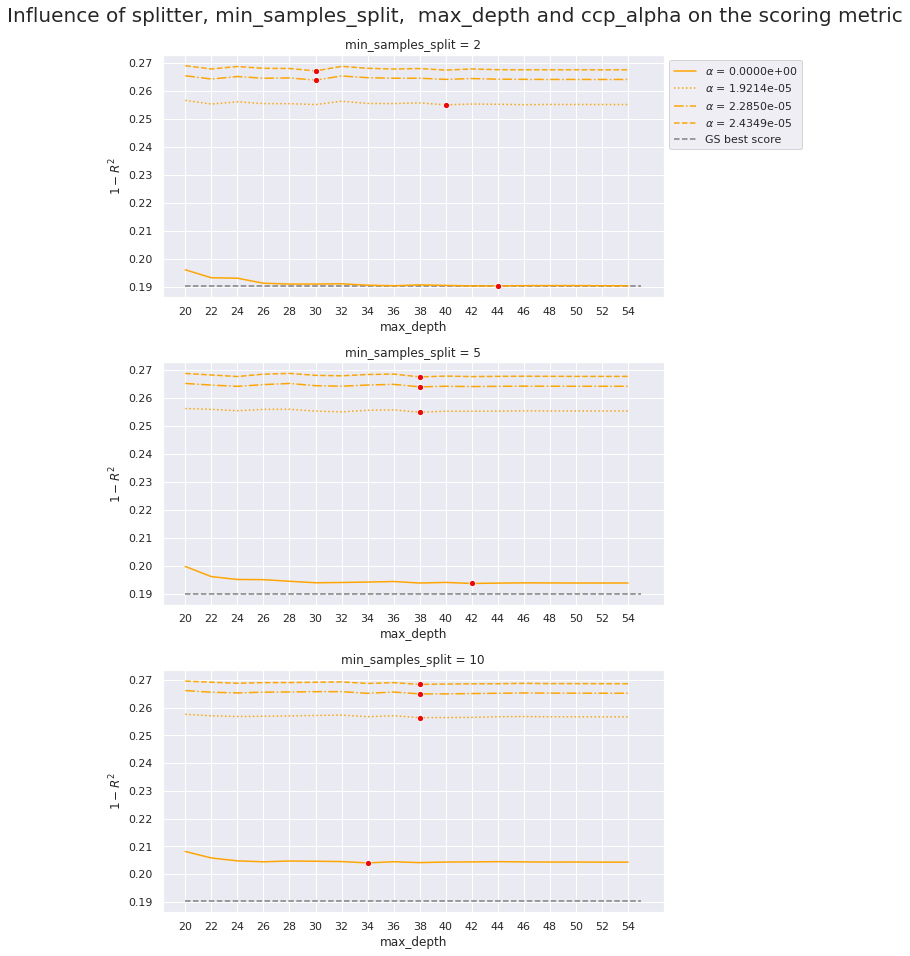

In [19]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 13))

ls = dict(zip(HP2['ccp_alpha'], ['-', ':', '-.', '--']))

for ax, mss in zip(axs.flat, HP2['min_samples_split']):
    for alpha in HP2['ccp_alpha']:
        R = RFR_GS2[(RFR_GS2.param_min_samples_split == mss) &
                    (RFR_GS2.param_ccp_alpha == alpha)]\
            .set_index('param_max_depth')[SC['R2E']['OOB']]
        ax.plot(R.index, R, ls=ls[alpha], c='orange', zorder=1, 
                label=fr"$\alpha$ = {alpha:.4e}")
        ax.scatter(R.idxmin(), R.min(), s=40, c='red', ec='white', zorder=2)
    ax.hlines(RFR_GS2[SC['R2E']['OOB']].min(), xmin=dmin, xmax=dmax,
              colors='gray', ls='dashed', zorder=1, label="GS best score")
    ax.set(xticks=R.index, xlabel="max_depth", ylabel=slab['R2E'], 
           title=f"min_samples_split = {mss}")    

axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")

fig.tight_layout()
if save_plot:
    name = f"2.IGBP{lc_id}_RFR_R2E_Gs2Results_OOB"
    plt.savefig(os.path.join(plot_dir, f"{name}.{SPP['format']}"), **SPP)

fig.suptitle("Influence of splitter, min_samples_split, "
             " max_depth and ccp_alpha on the scoring metric", y=1.02, size=20)
plt.show()

### Some relevant models

Let us analyse carefully some regressors. In particular we want to look at how the random forest performances might be improved by fixing a limitation on the maximum depth of their trees. Moreover, we want to see if different scoring metrics emphasise different behaviours. In order to do that let us look at their predictive performances in terms of the score metrics on the test set.

In [20]:
maxdepth = [('md', pd.notna), ('no_md', pd.isna)]

index_cols = ['method', 'scoring', 'md']
param_cols = list(HP1.keys()) + list(HP2.keys())
score_cols = ['OOB_R2E'] + [f'{l}_{s}' for s in scores for l in ['CV', 'Test']]
rank_cols = [f'{l}_Rank' for l in score_cols]

# Merge the two Grid Search results together
RFR_GS1[[f'param_{key}' for key in HP2.keys()]] = [2, None, 0]
RFR_GS2[[f'param_{key}' for key in HP1.keys()]] = [ne, mf]
RFR_GS = pd.concat([RFR_GS1, RFR_GS2], ignore_index=True)

In [21]:
# Dictionary that will contain the relevant models
RFR = {key: None for key, _ in maxdepth}
# DataFrame that will contain parameters and results of Relevant Models
RM = pd.DataFrame()

for md, f in maxdepth:
    # Find relevant model's parameters
    idx = RFR_GS[f(RFR_GS['param_max_depth'])][SC['R2E']['OOB']].idxmin()
    R = RFR_GS.loc[idx].copy()
    P = {p: R[f'param_{p}'] for p in param_cols}
                                               
    # Fit the selected relevant model
    rgr = RandomForestRegressor(**P, **RFR_BP)
    rgr.fit(X_train, y_train)
    
    # Prediction on the test set
    y_pred = rgr.predict(X_test)
    # Score metrics estimated and computed on the train set
    if pd.isna(R[f'mean_test_{scores[0]}']): 
        #If the condition is true for one score metric, it is true for all of them
        CV = cross_validate(estimator=RandomForestRegressor(**P, **RFR_BP),
                            X=X_train, y=y_train,
                            scoring=GS_SCORES, cv=k,
                            n_jobs=-1, verbose=5)
        CV = pd.DataFrame(CV)
        for key in GS_SCORES:
            R[f'mean_test_{NEW_SCORES[key][0]}'] = \
            CV[f'test_{key}'].map(NEW_SCORES[key][1]).mean()
    E = {key: [R[f'mean_test_{key}'],
               SCORES[key](y_true=y_test, y_pred=y_pred)] for key in scores}
    
    # Store parameters and results
    values = ['OOB', 'R2E', md] + list(P.values()) + [R['OOB_R2E']] + \
             [l for key in scores for l in E[key]]
    df = pd.DataFrame(values, index=index_cols+param_cols+score_cols).T
    RM = pd.concat([RM, df], ignore_index=True)

    # Store relevant model
    RFR[md] = rgr

# Setting dataframe index
RM.set_index(index_cols, inplace=True)
# Converting scores into float
RM[score_cols].astype('float64', copy=False)

# Rank models according to CV or Test performances
for sc, rc in zip(score_cols, rank_cols):
    RM.loc[RM.sort_values(by=sc).index, rc] = list(range(1, RM.shape[0]+1))

display(RM)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  3.0min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.0min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished


n_estimators max_features min_samples_split max_depth  \
method scoring md                                                            
OOB    R2E     md             366            6                 2        44   
               no_md          366            6                 2      None   

                     ccp_alpha   OOB_R2E    CV_MSE  Test_MSE    CV_R2E  \
method scoring md                                                        
OOB    R2E     md          0.0  0.190255  0.008527  0.008830  0.195468   
               no_md       0.0  0.190296  0.008533  0.008861  0.195593   

                      Test_R2E  OOB_R2E_Rank  CV_MSE_Rank  Test_MSE_Rank  \
method scoring md                                                          
OOB    R2E     md     0.205453             1            1              1   
               no_md  0.206181             2            2              2   

                      CV_R2E_Rank  Test_R2E_Rank  
method scoring md                                 
OOB    R2E     md               1              1  
               no_md            2              2

## Geographical visualization of the residuals  

Let us visualize on the planisphere the prediction residuals of a relevant models. The residuals will be computed on both the train and the test data sets.  

In [22]:
# GeoDataFrame containing the residuals and the geometry information
RES = data[['geometry']].copy()

# Masks that allow to distinguish among the origin of residuals
test_ids = y_test.index
train_ids = y_train.index

for md, _ in maxdepth:
    # Prediction on the test set
    y_pred_test = RFR[md].predict(X_test)
    # Prediction on the train set
    y_pred_train = RFR[md].predict(X_train)

    # Residuals are stored in the same column
    RES[md] = pd.concat([y_test - y_pred_test, y_train - y_pred_train])

In [23]:
GPP = {'show': False, 'save': True, 'plot_dir': plot_dir, 'save_params': SPP,
       'plot_params': {'cmap': 'seismic_r', 'boundary_color': 'grey',
                       'land_color': '#e0c36c'},
       'adjust_colorbar_params': {'center_on_zero': True, 'vmin': -1, 'vmax': 1}}

if save_plot:
    # Save the residuals maps for all the relevant models
    for md, _ in maxdepth:
        # Test residuals
        VALUESON = {'valueson': [RES.loc[test_ids][md].min(),
                                 RES.loc[test_ids][md].max()]}
        GPP['adjust_colorbar_params'].update(VALUESON)
        GPP['plot_params']['markersize'] = 20
        GeoPlot(RES.loc[test_ids], col=md, **GPP,
                title=f"3.IGBP{lc_id}_RFR_R2E_ResidualsMapTest_OOB_{md}")
        # Train residuals
        VALUESON = {'valueson': [RES.loc[train_ids][md].min(),
                                 RES.loc[train_ids][md].max()]}
        GPP['adjust_colorbar_params'].update(VALUESON)
        GPP['plot_params']['markersize'] = 9
        GeoPlot(RES.loc[train_ids], col=md, **GPP,
                title=f"4.IGBP{lc_id}_RFR_R2E_ResidualsMapTrain_OOB_{md}")
        # All residuals
        VALUESON = {'valueson': [RES[md].min(), RES[md].max()]}
        GPP['adjust_colorbar_params'].update(VALUESON)
        GeoPlot(RES, col=md, **GPP,
                title=f"5.IGBP{lc_id}_RFR_R2E_ResidualsMap_OOB_{md}")

In [24]:
# Select a specific model to look at in the following 
md = 'no_md'  # 'md' #

# Update settings for GeoPlot function in order to show the above created plots
GPP['show'] = True
GPP['save'] = False

### Test residuals

Minimum residual: -0.5061.<br>Maximum residual: 0.8307

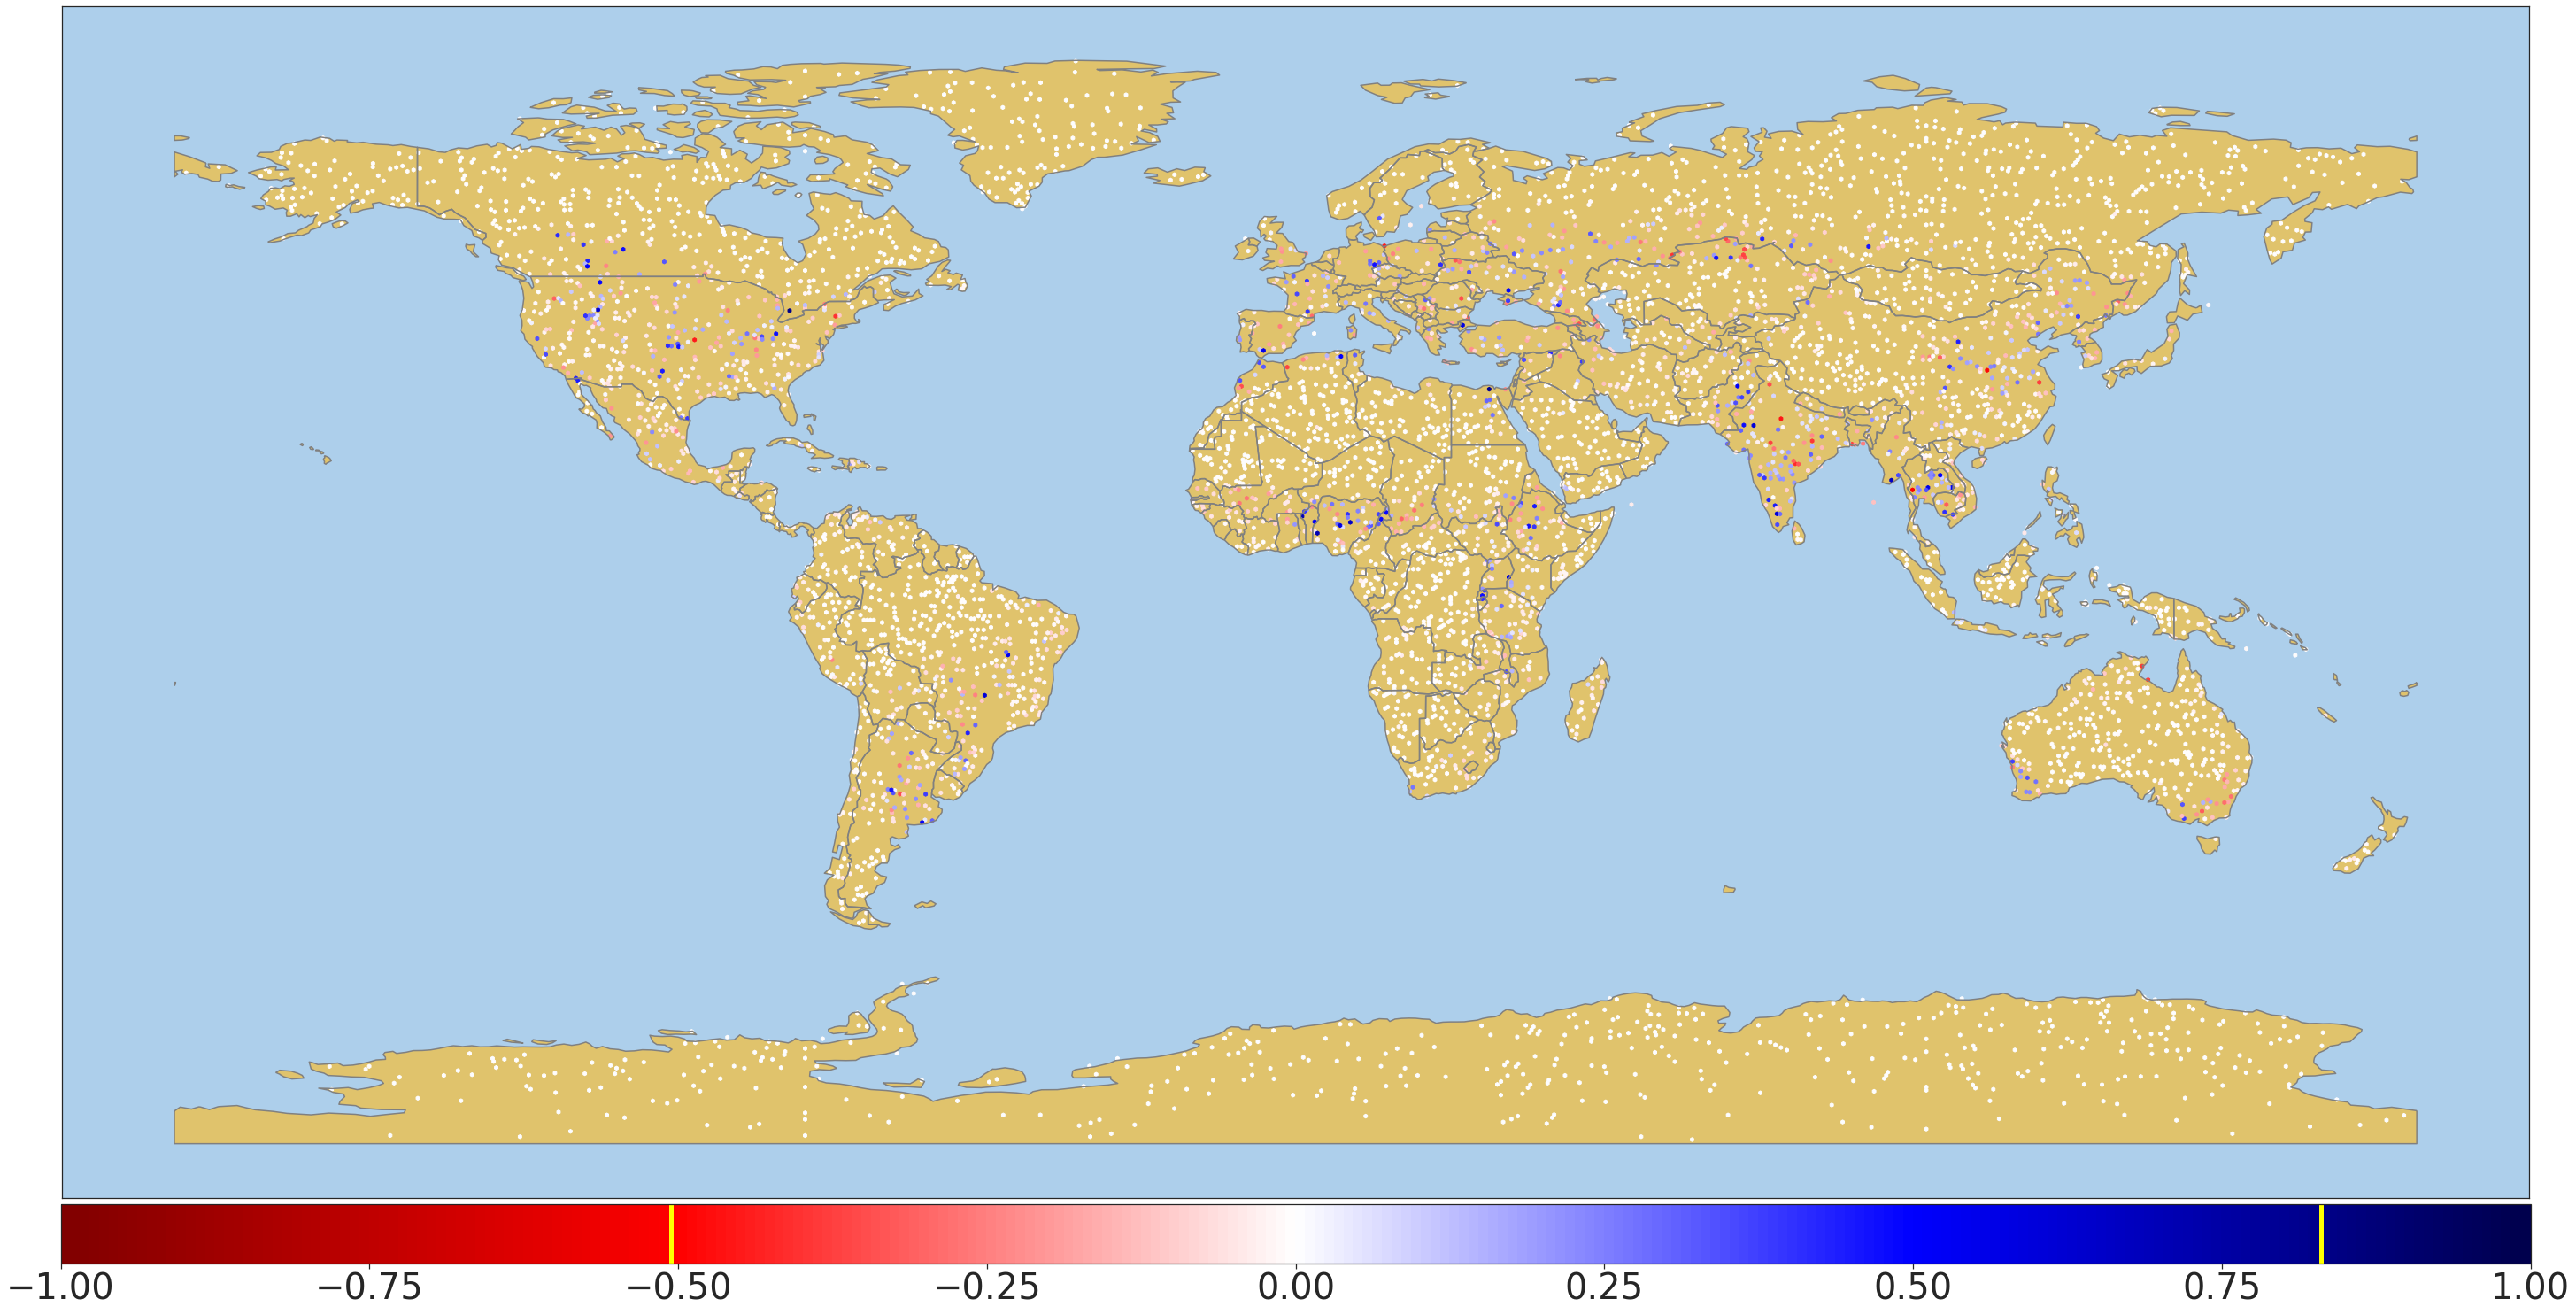

In [25]:
VALUESON = {'valueson': [RES.loc[test_ids][md].min(), 
                         RES.loc[test_ids][md].max()]}
GPP['adjust_colorbar_params'].update(VALUESON)
GPP['plot_params']['markersize'] = 20

GeoPlot(RES.loc[test_ids], col=md, **GPP,
        title=f"3.IGBP{lc_id}_RFR_R2E_ResidualsMapTest_OOB_{md}")

display(Markdown(f"Minimum residual: {RES.loc[test_ids][md].min():.4}.<br>"
                 f"Maximum residual: {RES.loc[test_ids][md].max():.4}"))

### Train residuals

Minimum residual: -0.2795.<br>Maximum residual: 0.3426

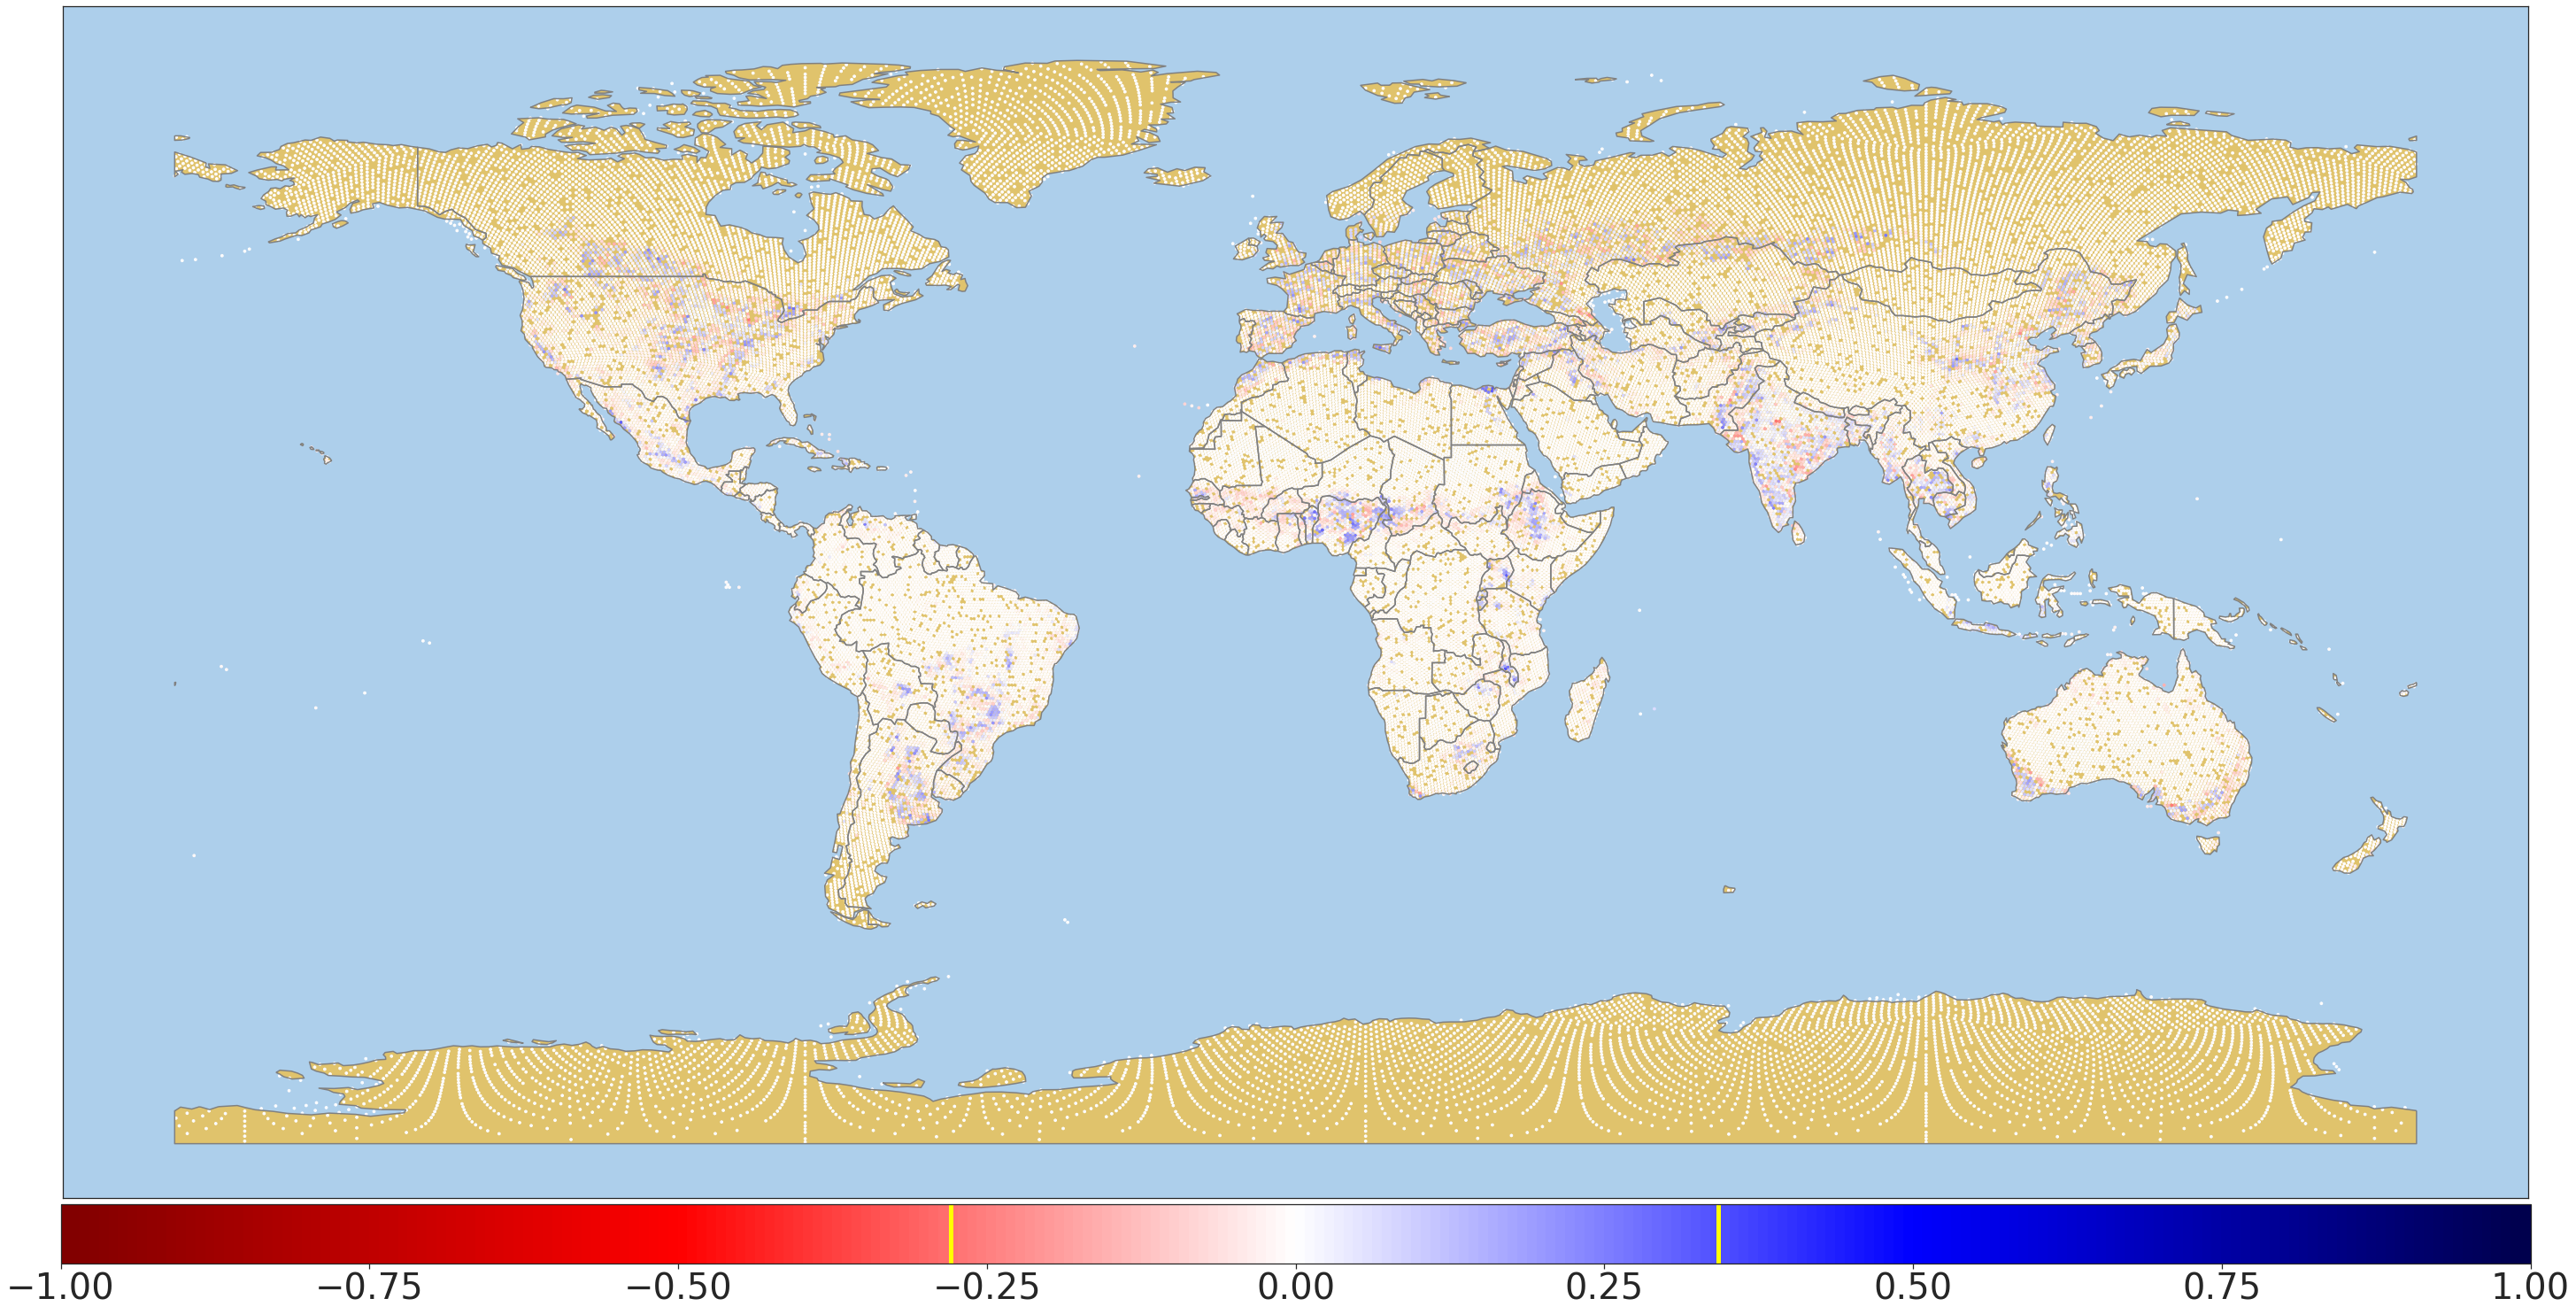

In [26]:
VALUESON = {'valueson': [RES.loc[train_ids][md].min(),
                         RES.loc[train_ids][md].max()]}
GPP['adjust_colorbar_params'].update(VALUESON)
GPP['plot_params']['markersize'] = 9

GeoPlot(RES.loc[train_ids], col=md, **GPP,
        title=f"4.IGBP{lc_id}_RFR_R2E_ResidualsMapTrain_OOB_{md}")

display(Markdown(f"Minimum residual: {RES.loc[train_ids][md].min():.4}.<br>"
                 f"Maximum residual: {RES.loc[train_ids][md].max():.4}"))

### All residuals

Minimum residual: -0.5061.<br>Maximum residual: 0.8307

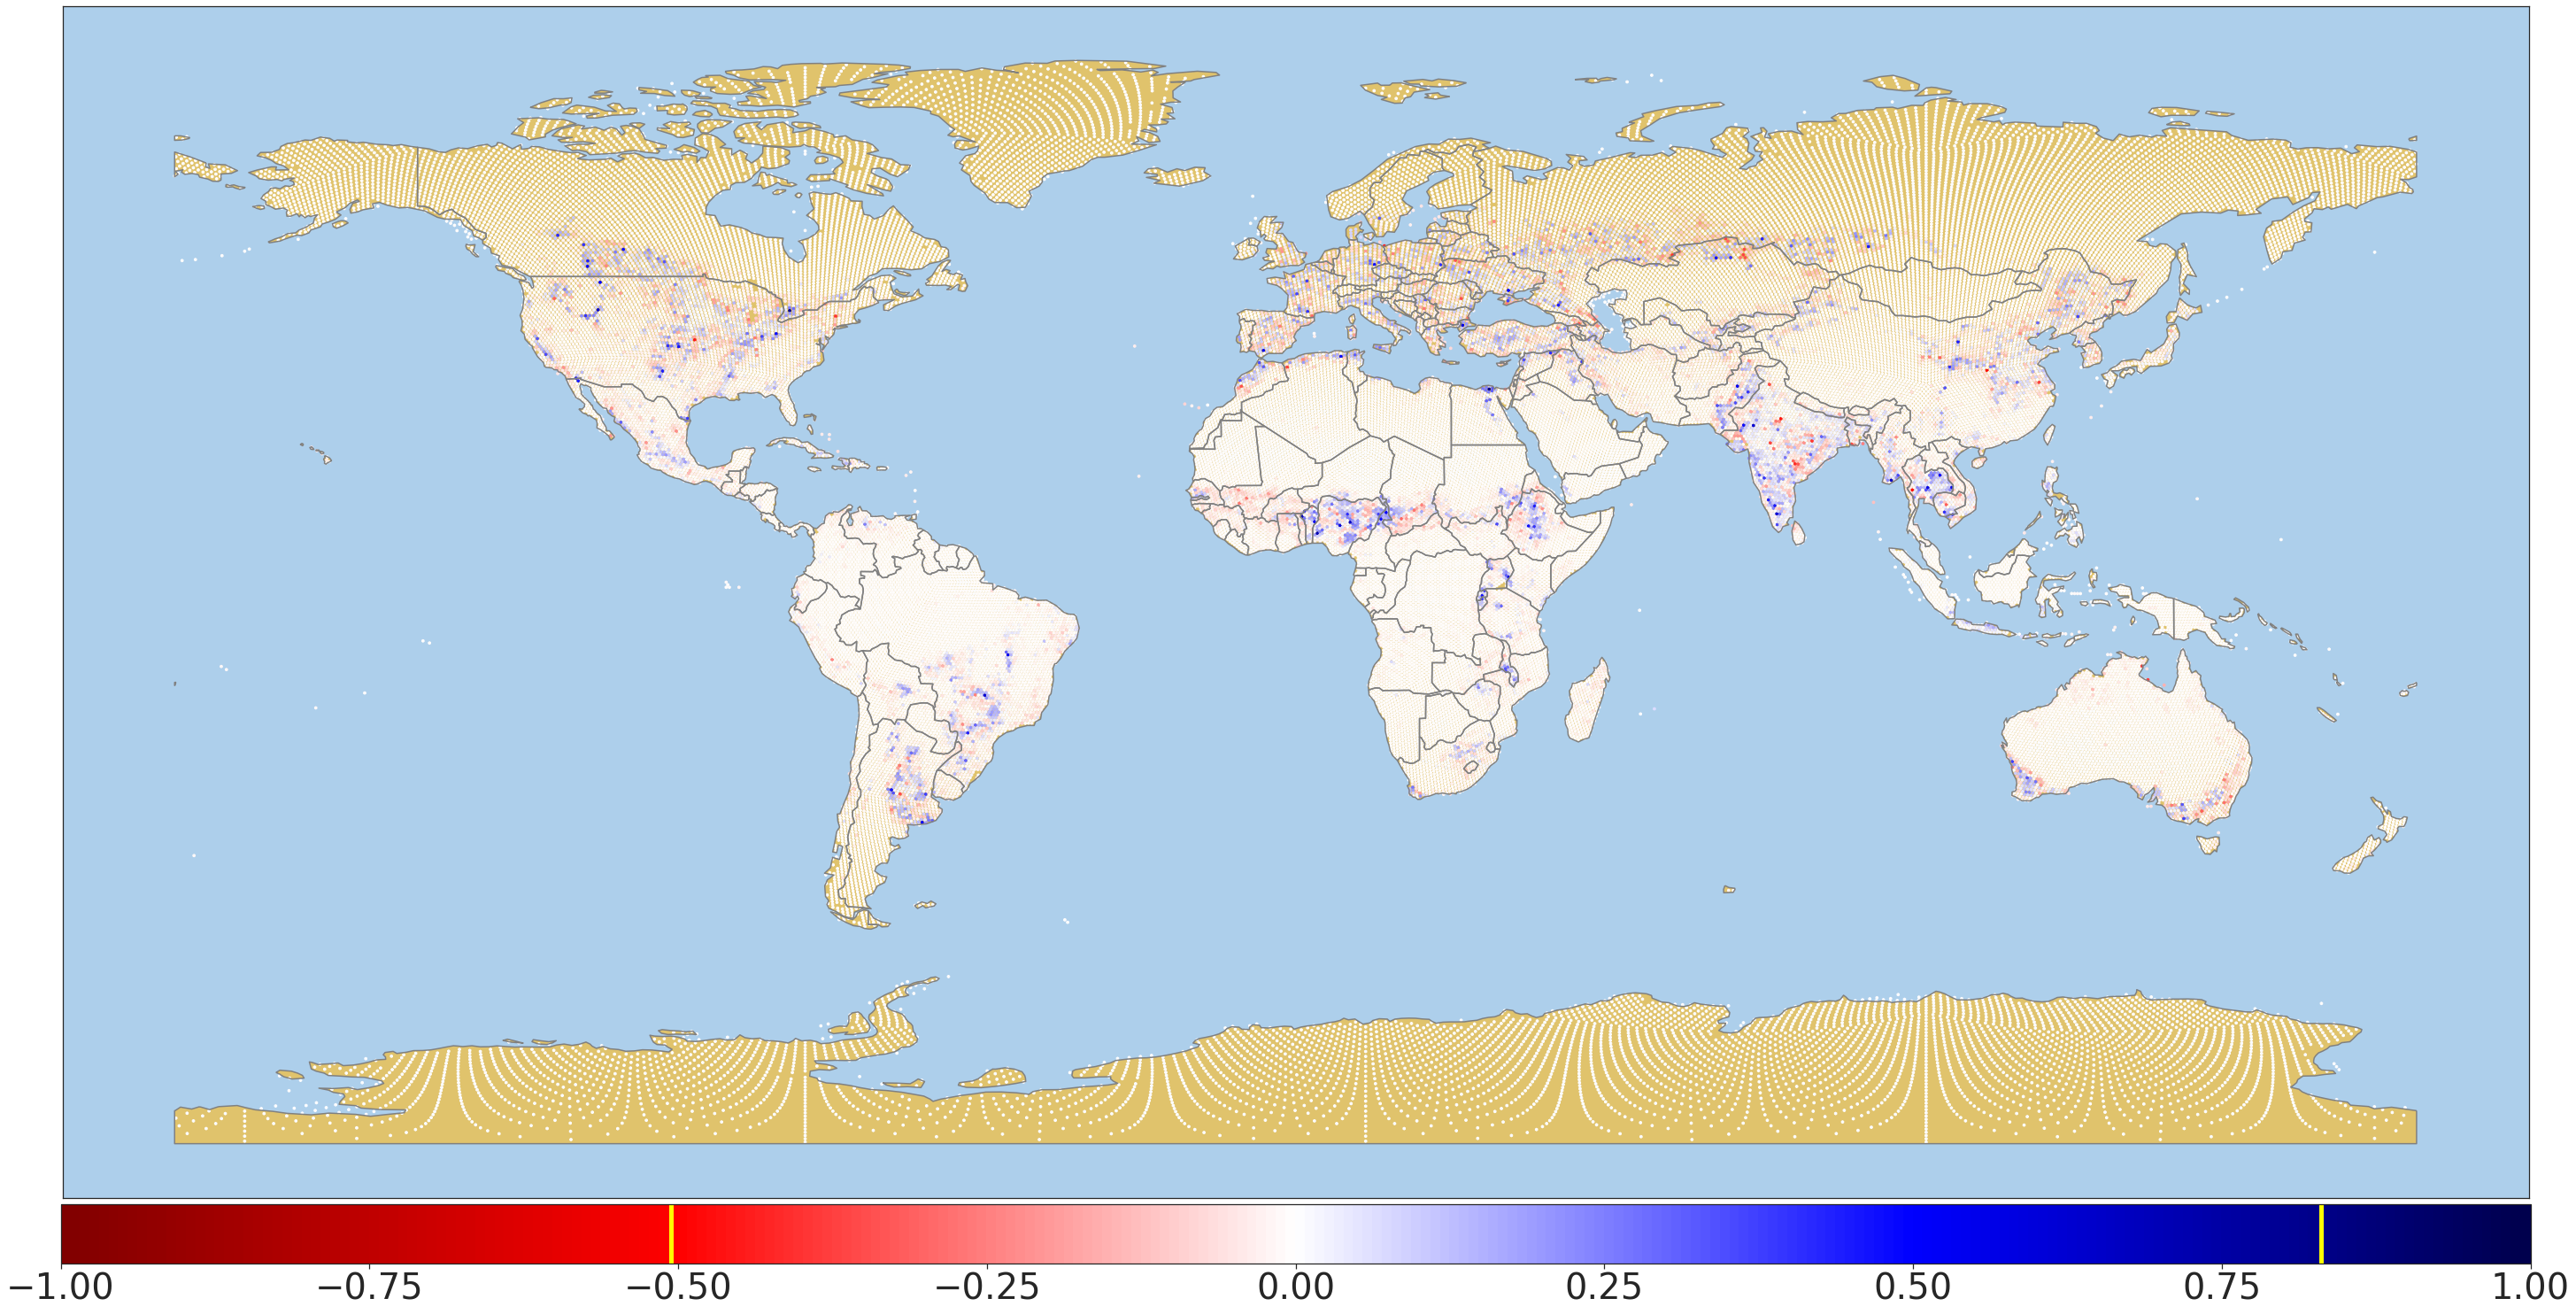

In [27]:
VALUESON = {'valueson': [RES[md].min(), RES[md].max()]}
GPP['adjust_colorbar_params'].update(VALUESON)
GPP['plot_params']['markersize'] = 9

GeoPlot(RES, col=md, **GPP,
        title=f"5.IGBP{lc_id}_RFR_R2E_ResidualsMap_OOB_{md}")

display(Markdown(f"Minimum residual: {RES[md].min():.4}.<br>"
                 f"Maximum residual: {RES[md].max():.4}"))

## Model Interpretation

### Importance of features as mean decrease of impurity

Let us look at the importance that each feature assumes in the previous relevant models.

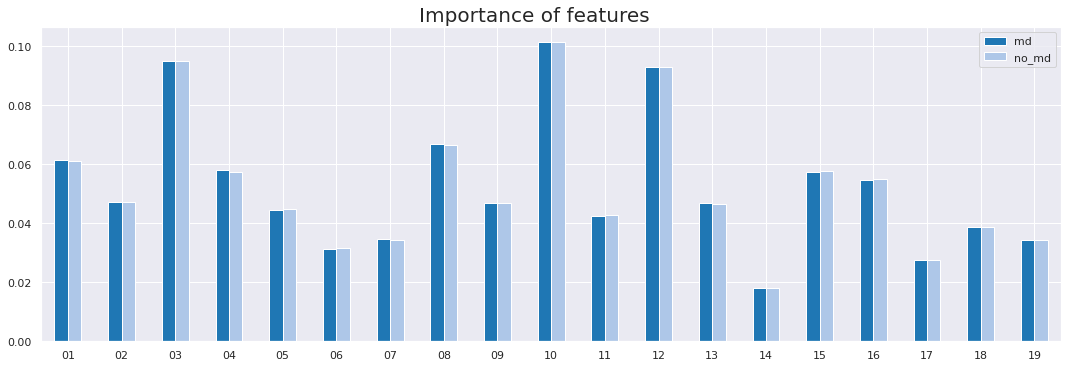

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))

# Extract importance of features of relevant models
FI = pd.DataFrame([RFR[md].feature_importances_ for md,_ in maxdepth],
                  columns=bv_ids, index=[f'{md}' for md, _ in maxdepth]).T

FI.plot(kind='bar', rot=0, ax=ax, 
        color=[get_cmap('tab20')(i) for i in range(FI.shape[1])])

fig.tight_layout()
if save_plot:
    name = f"6.IGBP{lc_id}_RFR_R2E_FeatureImportances_OOB"
    plt.savefig(os.path.join(plot_dir, f"{name}.{SPP['format']}"), **SPP)

plt.suptitle("Importance of features", y=1.02, size=20)
plt.show()

More in detail, let us look at the feature importance ranking for the relevant models individually.

In [29]:
if save_plot:
    # Save the feature importance ranking plot for all the relevant models
    for md, _ in maxdepth:
        name = f"7.IGBP{lc_id}_RFR_R2E_FeatureImportanceRanking_OOB_{md}"
        FeatureImportanceRanking(RFR[md], bv_labels, show=False,
                                 save=True, plot_dir=plot_dir,
                                 title=name, save_params=SPP)

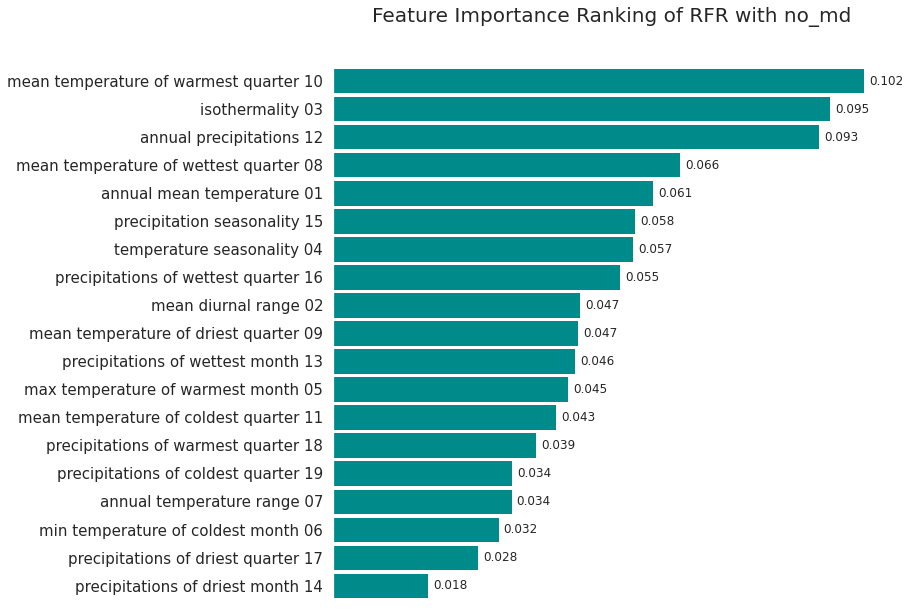

In [30]:
# Select a specific model to look at
md = 'no_md'  # 'md' #

fig, ax = plt.subplots(figsize=(10, 10))

name = f"7.IGBP{lc_id}_RFR_R2E_FeatureImportanceRanking_OOB_{md}"
FeatureImportanceRanking(RFR[md], bv_labels, ax=ax, plot_dir=plot_dir,
                         title=name, save_params=SPP)

fig.suptitle(f"Feature Importance Ranking of RFR with {md}",
             y=1.1, size=20, transform=ax.transAxes)
plt.show()

### Permutation Importance of features

In [31]:
if save_plot:
    # Save the permutation importance ranking for all the relevant models
    for md, _ in maxdepth:
        # Permutation impornce ranking for model description
        name = f"8.IGBP{lc_id}_RFR_R2E_PermutationImportanceRankingForModelDescription_OOB_{md}"
        PermutationImportanceRanking(RFR[md], X_train, y_train, bv_labels,
                                     rounding=5, show=False, save=True,
                                     plot_dir=plot_dir, title=name, 
                                     save_params=SPP)

        # Permutation importance ranking for model generalisation ability
        name = f"9.IGBP{lc_id}_RFR_R2E_PermutationImportanceRankingForGeneralisation_OOB_{md}"
        PermutationImportanceRanking(RFR[md], X_test, y_test, bv_labels,
                                     rounding=5, show=False, save=True,
                                     plot_dir=plot_dir, title=name,
                                     save_params=SPP)

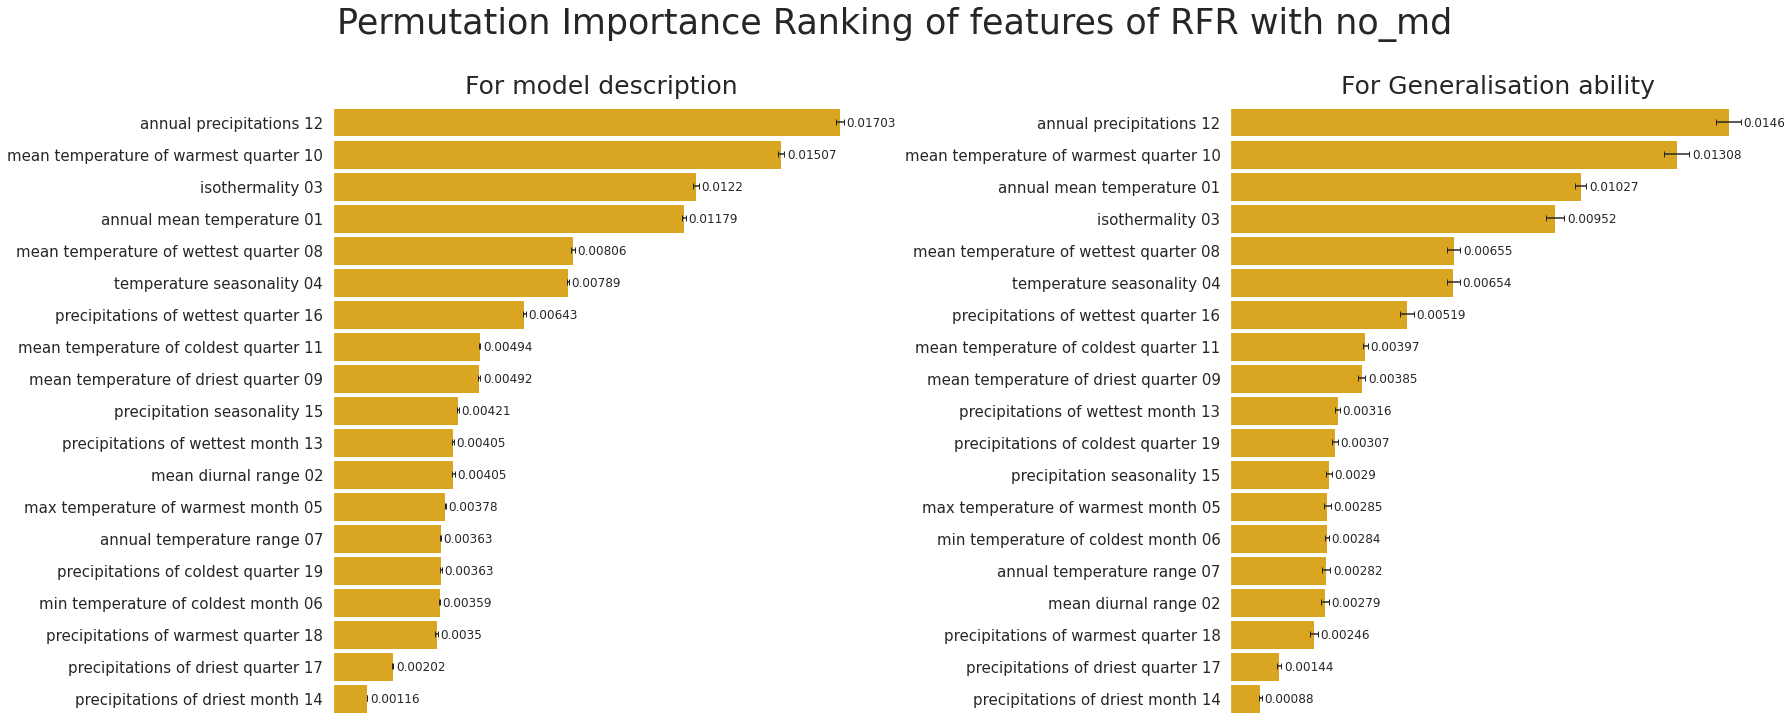

In [32]:
# Select a specific model to look at
md = 'no_md'  # 'md' #

fig, ax = plt.subplots(ncols=2, figsize=(25, 10))

# Permutation importance ranking for model description
name = f"8.IGBP{lc_id}_RFR_R2E_PermutationImportanceRankingForModelDescription_OOB_{md}"
PermutationImportanceRanking(RFR[md], X_train, y_train, bv_labels, ax=ax[0],
                             rounding=5, plot_dir=plot_dir, title=name,
                             save_params=SPP)
ax[0].set_title("For model description", size=25)

# Permutation importance ranking for model generalisation ability
name = f"9.IGBP{lc_id}_RFR_R2E_PermutationImportanceRankingForGeneralisation_OOB_{md}"
PermutationImportanceRanking(RFR[md], X_test, y_test, bv_labels, ax=ax[1],
                             rounding=5, plot_dir=plot_dir, title=name,
                             save_params=SPP)
ax[1].set_title("For Generalisation ability", size=25)

plt.suptitle(f"Permutation Importance Ranking of features of RFR with {md}",
             y=1.01, size=35)
plt.tight_layout()
plt.show()

 ### Partial Dependence Plots

In [33]:
if save_plot:
    # Save the partial dependence plot of all features for each relevant model
    for md, _ in maxdepth:
        name = f"10.IGBP{lc_id}_RFR_R2E_PartialDependencePlots_OOB_{md}"
        PartialDependencePlots(RFR[md], X_train, features=bv_cols,
                               feature_labels=bv_labels, show=False, save=True,
                               plot_dir=plot_dir, title=name, save_params=SPP)

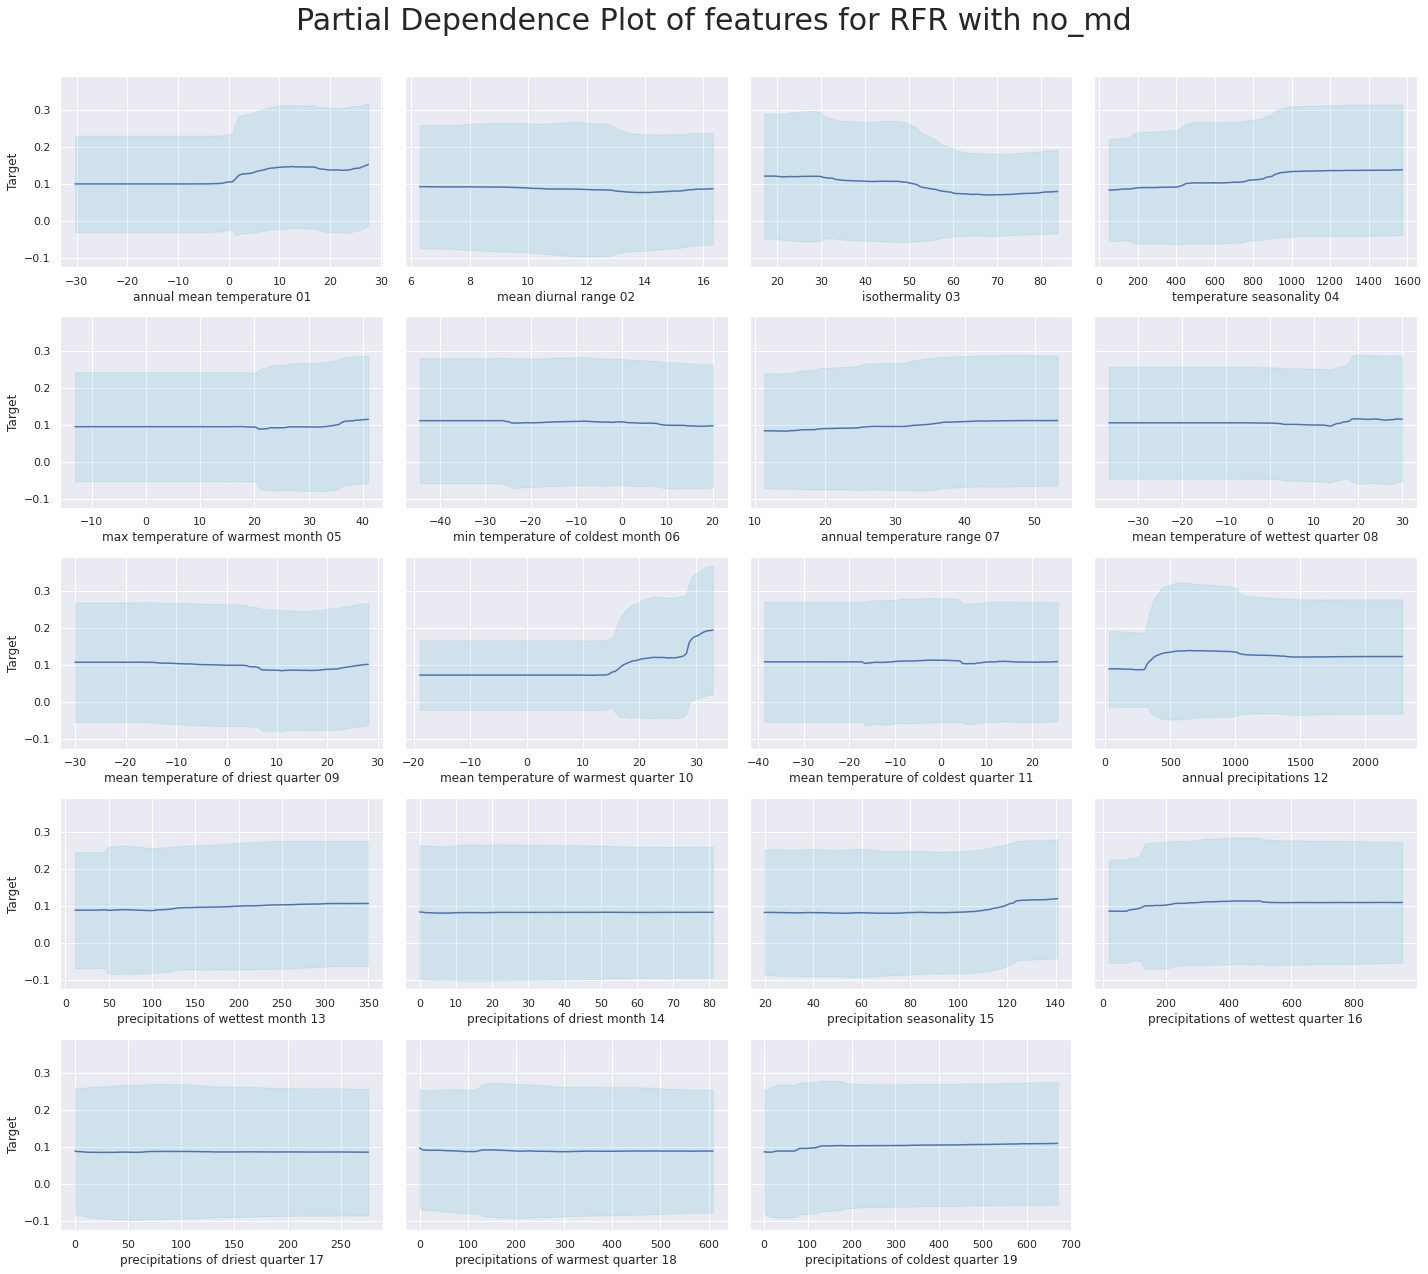

In [34]:
# Select a specific model to look at
md = 'no_md'  # 'md' #

name = f"10.IGBP{lc_id}_PartialDependencePlots_OOB_{md}"
fig, ax = PartialDependencePlots(RFR[md], X_train, features=bv_cols, 
                                 feature_labels=bv_labels, plot_dir=plot_dir,
                                 title=name, save_params=SPP)

fig.suptitle(f"Partial Dependence Plot of features for RFR with {md}",
             y=1.01, size=30)
plt.tight_layout()
plt.show()

### Using SHAP values

#### SHAP beeswarm summary

#### SHAP importance of features

#### SHAP dependence plots